In [161]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb
from tensorflow.keras import models, layers, optimizers
from tensorflow.keras.preprocessing.text import Tokenizer
import tensorflow.keras as keras

## Loading de data

In [162]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10_000)

print(x_train.shape)
print(x_test.shape)

(25000,)
(25000,)


## Examining the data

In [163]:
print(x_train[0])
print(y_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1


## One-hot encoding the output

In [164]:
# Función
def vectorizar(sequences, dim=10_000):
    restults = np.zeros((len(sequences),dim))
    for i, sequences in enumerate(sequences):
        restults[i,sequences]=1
    return restults    

x_train_def = vectorizar(x_train)
x_test_def = vectorizar(x_test)

In [165]:
print(x_train_def)
print(x_train_def.shape)

[[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]
(25000, 10000)


La función de arriba también funciona como un tokenizer, pero voy a utilizar la que ya trae keras

In [166]:
# tokenizer de keras
tokenizer = Tokenizer(num_words=10_000)

x_train = tokenizer.sequences_to_matrix(x_train, mode='binary')
x_test = tokenizer.sequences_to_matrix(x_test, mode='binary')

In [167]:
print(x_train)
print(x_train.shape)

[[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]
(25000, 10000)


La salida ya viene ne ceros y unos, así que solo la pasamos a array y float

In [168]:
y_train = np.asarray(y_train).astype('float32')
y_test = np.asarray(y_test).astype('float32')

print(y_train.shape)
print(y_train.shape)

(25000,)
(25000,)


In [169]:
print(y_test)

[0. 1. 1. ... 0. 0. 0.]


## Building the model architecture

In [175]:
model = models.Sequential()
model.add(layers.Dense(12,activation='relu',input_shape=(10_000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

model.compile(loss='binary_crossentropy',
                optimizer='rmsprop',
                metrics=['accuracy'])

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_22 (Dense)                │ (None, 12)             │       120,012 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 12)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │            13 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 120,025 (468.85 KB)

 Trainable params: 120,025 (468.85 KB)

 Non-trainable params: 0 (0.00 B)

## Training the model

In [176]:
x_split = int(len(x_train)*0.7)
y_split = int(len(y_train)*0.7)

x_val = x_train[:x_split]
partial_x_train = x_train[x_split:]

y_val = y_train[:y_split]
partial_y_train =  y_train[y_split:]

In [177]:
hist = model.fit(partial_x_train, partial_y_train,
            batch_size=512,
            epochs=5,
            validation_data=(x_val, y_val))

Epoch 1/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 332ms/step - accuracy: 0.6056 - loss: 0.6515 - val_accuracy: 0.8355 - val_loss: 0.5161
Epoch 2/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.8035 - loss: 0.4973 - val_accuracy: 0.8583 - val_loss: 0.4441
Epoch 3/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.8464 - loss: 0.4202 - val_accuracy: 0.8682 - val_loss: 0.4006
Epoch 4/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.8672 - loss: 0.3707 - val_accuracy: 0.8725 - val_loss: 0.3671
Epoch 5/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.8820 - loss: 0.3352 - val_accuracy: 0.8752 - val_loss: 0.3450


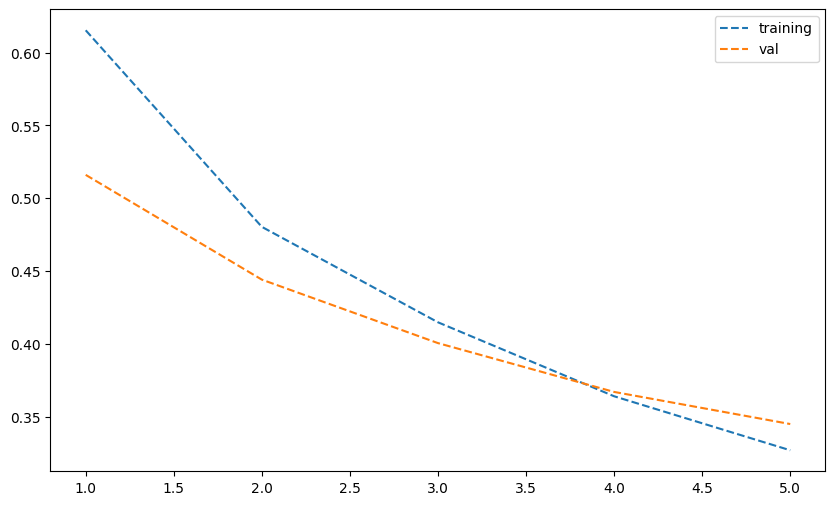

In [178]:
history = hist.history
loss_values = history['loss']
val_loss_values = history['val_loss']

fig = plt.figure(figsize=(10,6))
epoch = range(1,len(loss_values)+1)
plt.plot(epoch,loss_values, '--',label='training')
plt.plot(epoch,val_loss_values, '--',label='val')
plt.legend()
plt.show()

## Evaluating the model

In [179]:
model.evaluate(x_test, y_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.8720 - loss: 0.3554


[0.35461124777793884, 0.8720399737358093]